In [192]:
import pandas as pd

import the data from the given link: https://github.com/dsrscientist/dataset3/blob/main/Salaries.csv    

In [193]:
df1=pd.read_csv('Salaries.csv')

In [194]:
df=pd.DataFrame(data=df1)

In [195]:
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [196]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [197]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [198]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

we see that there is no null value in the given Dataset

# EDA

scatterplot:

In [199]:
import seaborn as sns

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

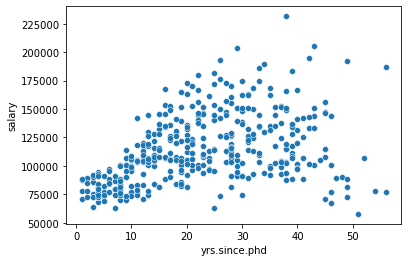

In [200]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

we can see that 'yrs.since.phd' is equally distributed in the range 0 to 46

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

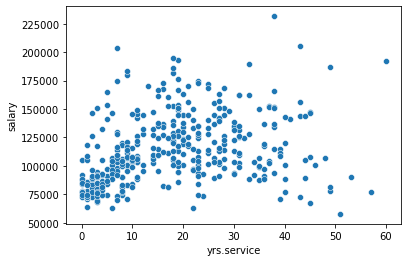

In [201]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

we can see that 'yrs.service' is equally distributed in the range 0 to 46

In [202]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


From the above code we see that 'rank', 'discipline','sex' columns are object type.so,here we use LabelEncoder to convert in a numerical value.

# LabeEncoder

In [203]:
 from sklearn.preprocessing import LabelEncoder

In [204]:
le=LabelEncoder()
list1=['rank', 'discipline','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


now df1 is the actual dataset and df is the after using labelEncoder dataset

<AxesSubplot:xlabel='rank', ylabel='salary'>

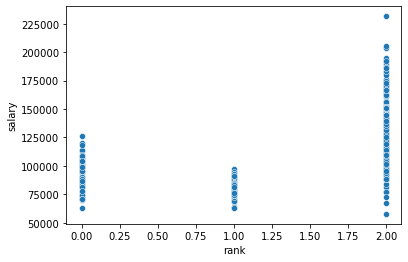

In [205]:
sns.scatterplot(x="rank",y='salary',data=df)

we se that there are three type value in the "rank" column

<AxesSubplot:xlabel='discipline', ylabel='salary'>

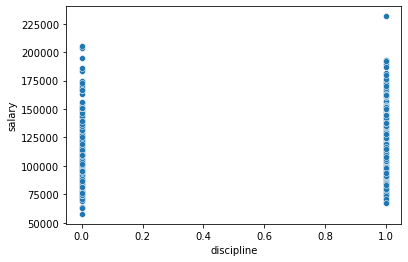

In [206]:
sns.scatterplot(x="discipline",y="salary",data=df)

we see that there are two type value in the "discipline" column

<AxesSubplot:xlabel='sex', ylabel='salary'>

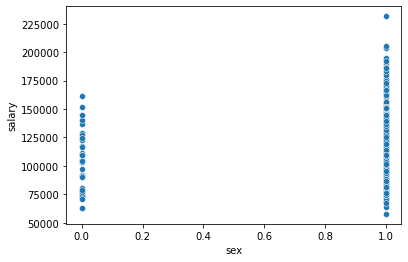

In [207]:
sns.scatterplot(x="sex",y="salary",data=df)

we see that there are two type value in the "sex" column

# Correlation:

In [208]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


correlation using heatmap

<AxesSubplot:>

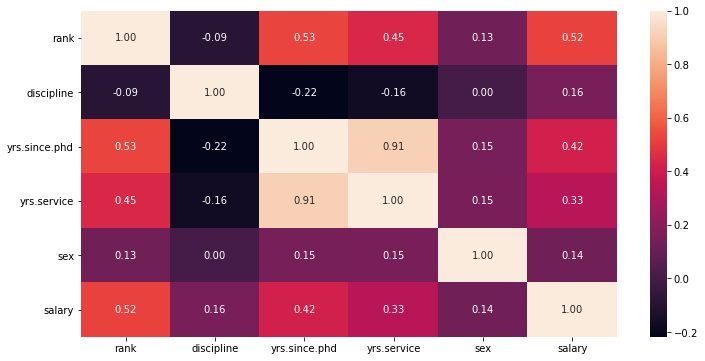

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

We see from the heatmap that all the columns of the dataset positively correlated with the target column

rank has 52 percent correlation with the target column which can be consider as a very good bond

disciplne has 16 percent correlation with the target column which can not be consider as a good bond

yrs.since.phd has 42 percent correlation with the target column which can be consider as a very good bond

yrs.service has 33 percent correlation with the target column which can be consider as a good bond

sex has 14 percent correlation with the target column which can not be consider as a good bond

Max correlation: rank

Min correlation: sex

# Describing Datasets:

In [210]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


we see that large gap between 75th percentile and max in yrs.service.It means outliers are present in the yrs.service column

<function matplotlib.pyplot.show(close=None, block=None)>

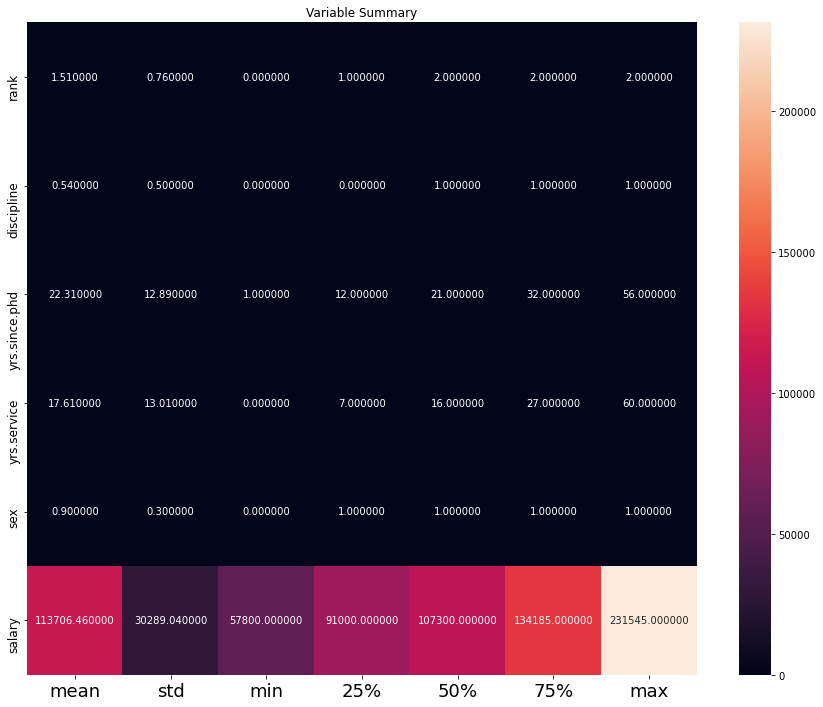

In [211]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show

# Outcome of describe of dataset

From the above ploting we are determining mean,standard deviation,min,25% percentile,50% percentile,75% percentile and maximum value of each column.
It helps us further in Data cleaning.

# Outliers Checking

rank                AxesSubplot(0.125,0.657941;0.352273x0.222059)
discipline       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
yrs.since.phd       AxesSubplot(0.125,0.391471;0.352273x0.222059)
yrs.service      AxesSubplot(0.547727,0.391471;0.352273x0.222059)
sex                    AxesSubplot(0.125,0.125;0.352273x0.222059)
salary              AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

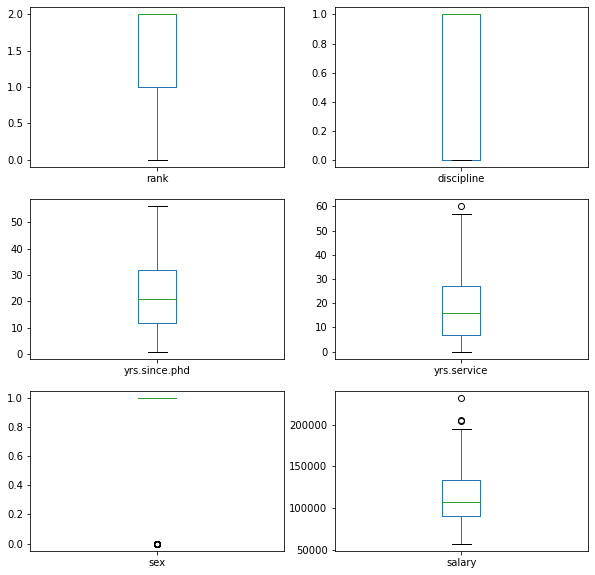

In [212]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(10,10))

From the above plot we see that there is no such outlier in any column

# Skewness

In [213]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:ylabel='Frequency'>

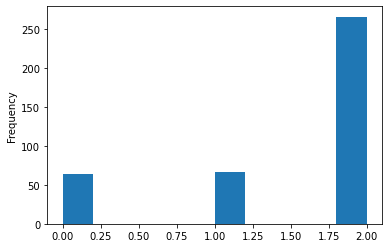

In [214]:
df['rank'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

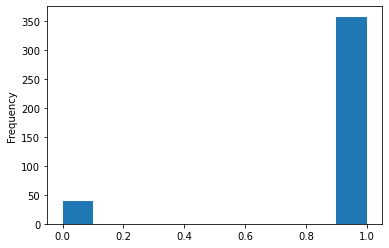

In [215]:
df['sex'].plot.hist()

Since the salary is not dependent on "sex" column,we drop this column

In [216]:
df=df.drop(['sex'],axis=1)

In [217]:
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Removing Outliers

In [218]:
from scipy.stats import zscore
import numpy as np

In [219]:
z=np.abs(zscore(df))

In [220]:
z.shape

(397, 5)

In [221]:
thresshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [222]:
df_new=df[(z<3).all(axis=1)]

In [223]:
df_new.shape

(393, 5)

In [224]:
df.shape

(397, 5)

# Percentage of Data loss

In [225]:
perecentage_of_data_loss=(397-394)/397*100
perecentage_of_data_loss

0.7556675062972292

we see that Outlier was only 0.75 percent

# Model without outliers is df and with desired outliers is df_new

Dividing data in features and vectors

In [226]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [227]:
print(x.shape)
print(y.shape)

(393, 4)
(393,)


In [228]:
 x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [229]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

# Transforming data to remove skewness

In [230]:
from sklearn.preprocessing import power_transform

In [231]:
x=power_transform(x,method='yeo-johnson')

In [232]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
sc=StandardScaler()

In [235]:
x=sc.fit_transform(x)

In [236]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

Since we have to predict the salary ,we will use LinearRegression

In [237]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
lr=LinearRegression()

# Spliting the DataFrame

In [238]:
m=0
for i in range (0,1000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(train_x,train_y)
    p=lr.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)
        

lm.score= 0.4952297809216195 at random state= 58


In [239]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=58)
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.4952297809216195